<a href="https://colab.research.google.com/github/bhavesh-choudhary1/machine_learning_concept/blob/main/MNIST_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/MNIST.csv')

In [ ]:
df.head()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [ ]:
df.shape

(42000, 785)

In [ ]:
df.sample(5)

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
19217      5       0       0       0       0       0       0       0       0   
22982      7       0       0       0       0       0       0       0       0   
13073      1       0       0       0       0       0       0       0       0   
19345      9       0       0       0       0       0       0       0       0   
38829      8       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
19217       0  ...         0         0         0         0         0   
22982       0  ...         0         0         0         0         0   
13073       0  ...         0         0         0         0         0   
19345       0  ...         0         0         0         0         0   
38829       0  ...         0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
19217         0         0         0         0         0  
22982         0         0         0         0         0  
13073         0         0         0         0         0  
19345         0         0         0         0         0  
38829         0         0         0         0         0  

[5 rows x 785 columns]

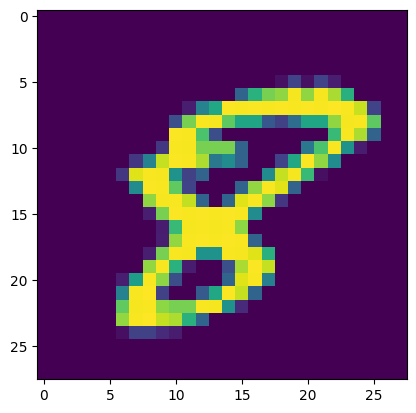

In [ ]:
plt.imshow(df.iloc[38829,1:].values.reshape(28,28))

In [ ]:
 x = df.iloc[:,1:]
 y = df.iloc[:,0]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train.shape

(33600, 784)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
knn.predict(x_test)

array([8, 1, 9, ..., 3, 0, 9])

In [ ]:
import time
start = time.time()
y_pred = knn.predict(x_test)
print(time.time()-start)

24.34904456138611


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9648809523809524

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [ ]:
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=200)

In [ ]:
x_train_trf = pca.fit_transform(x_train)
x_test_trf = pca.transform(x_test)

In [ ]:
x_train_trf.shape

(33600, 200)

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(x_train_trf,y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(x_test_trf)

In [ ]:
accuracy_score(y_test,y_pred)

0.9507142857142857

In [ ]:
#  for i in range(1,785):
#   pca = PCA(n_components=i)
#   x_train_trf = pca.fit_transform(x_train)
#   x_test_trf = pca.transform(x_test)

#   knn = KNeighborsClassifier()

#   knn.fit(x_train_trf,y_train)

#   y_pred = knn.predict(x_test_trf)

#   accuracy_score(y_test,y_pred)

In [ ]:
#transforming to a 2D coordinate system
pca = PCA(n_components=2)
x_train_trf = pca.fit_transform(x_train)
x_test_trf = pca.transform(x_test)

In [ ]:
x_train_trf

array([[-2.71863253, -0.48982409],
       [-0.67698015, -6.75362491],
       [-3.03323281,  6.50981624],
       ...,
       [ 2.14883643,  0.78079444],
       [ 1.05957006,  0.94767312],
       [17.70258446,  1.96188185]])

In [ ]:
x_train_trf.shape

(33600, 2)

In [ ]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter(x=x_train_trf[:,0],
                 y=x_train_trf[:,1],
                 color = y_train_trf,
                 color_discrete_sequence=px.colors.qualitative.G10)

fig.show()

In [ ]:
#transforming in 3D
pca = PCA(n_components=3)
x_train_trf = pca.fit_transform(x_train)
x_test_trf = pca.transform(x_test)

In [ ]:
x_train_trf.shape

(33600, 3)

In [ ]:
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x=x_train_trf[:,0],y = x_train_trf[:,1], z = x_train_trf[:,2],
                    color=y_train_trf)
fig.update_layout(
    margin=dict(l=20,r=20,t=20,b=20)
)
fig.show()

In [ ]:
 pca.explained_variance_
 # This are the eigen value

array([40.67111198, 29.17023401, 26.74459621])

In [ ]:
pca.explained_variance_ratio_


array([0.05785192, 0.0414927 , 0.03804239])

In [ ]:
pca.components_.shape
#this are the Eigen Vector

(3, 784)

#**Steps To Find Optinum Numbers of Principle Components**

In [ ]:
pca = PCA(n_components=None)
x_train_trf = pca.fit_transform(x_train)
x_test_trf = pca.transform(x_test)

In [ ]:
pca.explained_variance_.shape

(784,)

In [ ]:
pca.components_.shape

(784, 784)

In [ ]:
pca.explained_variance_ratio_

array([5.78519225e-02, 4.14926968e-02, 3.80423901e-02, 2.96626277e-02,
       2.58156168e-02, 2.25498018e-02, 1.97306802e-02, 1.77527998e-02,
       1.56865066e-02, 1.43606328e-02, 1.37025484e-02, 1.22725500e-02,
       1.14691200e-02, 1.12302739e-02, 1.05852885e-02, 1.01993106e-02,
       9.57676152e-03, 9.42708817e-03, 9.12489429e-03, 8.90170190e-03,
       8.39940495e-03, 8.20063196e-03, 7.85303229e-03, 7.56739707e-03,
       7.37261022e-03, 7.01884653e-03, 6.97919728e-03, 6.71104483e-03,
       6.39845030e-03, 6.30337291e-03, 6.15350848e-03, 6.02388659e-03,
       5.83673972e-03, 5.78547759e-03, 5.72333148e-03, 5.46399774e-03,
       5.43207369e-03, 5.28172755e-03, 5.13381744e-03, 4.94015474e-03,
       4.87671103e-03, 4.81978768e-03, 4.68204430e-03, 4.59342487e-03,
       4.57660834e-03, 4.49219022e-03, 4.44682221e-03, 4.41540749e-03,
       4.35111936e-03, 4.32032928e-03, 4.21808870e-03, 4.18243127e-03,
       4.07994349e-03, 4.02004913e-03, 3.98335855e-03, 3.94598812e-03,
      

In [ ]:
np.cumsum(pca.explained_variance_ratio_)
# we to this to find the 90% varience from this we can find the no of principle components

array([0.05785192, 0.09934462, 0.13738701, 0.16704964, 0.19286525,
       0.21541506, 0.23514574, 0.25289854, 0.26858504, 0.28294568,
       0.29664822, 0.30892077, 0.32038989, 0.33162017, 0.34220546,
       0.35240477, 0.36198153, 0.37140862, 0.38053351, 0.38943521,
       0.39783462, 0.40603525, 0.41388828, 0.42145568, 0.42882829,
       0.43584714, 0.44282633, 0.44953738, 0.45593583, 0.4622392 ,
       0.46839271, 0.4744166 , 0.48025334, 0.48603881, 0.49176214,
       0.49722614, 0.50265822, 0.50793994, 0.51307376, 0.51801392,
       0.52289063, 0.52771041, 0.53239246, 0.53698588, 0.54156249,
       0.54605468, 0.5505015 , 0.55491691, 0.55926803, 0.56358836,
       0.56780645, 0.57198888, 0.57606882, 0.58008887, 0.58407223,
       0.58801822, 0.59188694, 0.59571889, 0.59948441, 0.60322635,
       0.60687487, 0.6104829 , 0.61402176, 0.61750117, 0.62094441,
       0.62432378, 0.62767368, 0.63099377, 0.63426257, 0.63746765,
       0.64065542, 0.64376931, 0.64686564, 0.64992395, 0.65296

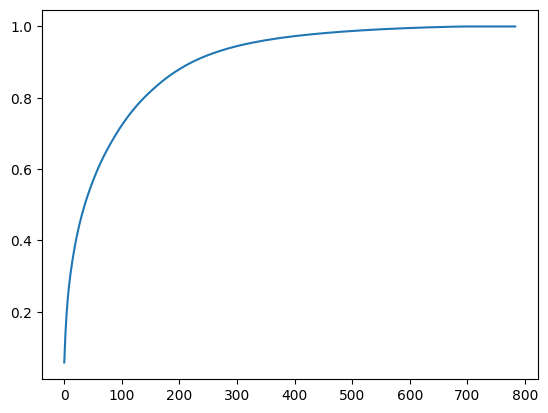

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [ ]:
# from this above steps we can find the optinum no of pronciple components

In [ ]:
flpca = PCA(n_components=230)
x_train_trf = pca.fit_transform(x_train)
x_test_trf = pca.transform(x_test)

In [ ]:
knn.fit(x_train_trf,y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(x_test_trf)

In [ ]:
accuracy_score(y_test,y_pred)

0.9495238095238095